In [25]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns


In [71]:
df = pd.read_csv("Data/aggregated_adm2.csv")
df = pd.DataFrame(df)
df = df.rename(columns = {'JAXA_GPM_L3_GSMaP_v6_operational_hourlyPrecipRate':"perc",
 'JAXA_GPM_L3_GSMaP_v6_reanalysis_hourlyPrecipRate':'perc_real',
 'MODIS_006_MOD11A1_LST_Day_1km':"ls_temp_day",
 'MODIS_006_MOD11A1_LST_Night_1km' : "ls_temp_night",
 'MODIS_006_MYD13A1_EVI' : "evi",
 'NASA_FLDAS_NOAH01_C_GL_M_V001_Qair_f_tavg': "humid",
 'NASA_FLDAS_NOAH01_C_GL_M_V001_Tair_f_tavg': "ns_temp",
 'NASA_FLDAS_NOAH01_C_GL_M_V001_Wind_f_tavg': "wind_speed",
                         'adm_level':'adm_level','date':'date' })

df.head()

,adm_level,date,perc,perc_real,ls_temp_day,ls_temp_night,evi,humid,ns_temp,wind_speed
0,Abra,2012-01-01,NaN,1.033367,14984.804979,14616.278838,4151.471745,0.012766,294.774562,4.659326
1,Abra,2012-02-01,NaN,58.082871,15066.672199,14643.203320,4172.497206,0.012791,295.165246,4.439152
2,Abra,2012-03-01,NaN,38.749088,15176.486307,14693.641494,3990.242186,0.012960,296.236624,3.880467
3,Abra,2012-04-01,NaN,104.277516,15145.847303,14703.742739,4524.423929,0.014471,297.701705,2.417304
4,Abra,2012-05-01,NaN,303.986075,15085.274689,11559.468880,4083.454357,0.015655,298.016335,2.415639


In [72]:
#Merge precipitation variables
index = df.perc.isnull()

percMerged = pd.DataFrame(np.empty((8352)), columns = list("p"))
percMerged = df.perc
percMerged[index] = df.perc_real[index]
df.perc = percMerged
df = df.drop("perc_real", axis = 1)
print(df.head())
df.to_csv(r'agg_merged.csv')

  adm_level        date        perc   ls_temp_day  ls_temp_night          evi  \
0      Abra  2012-01-01    1.033367  14984.804979   14616.278838  4151.471745   
1      Abra  2012-02-01   58.082871  15066.672199   14643.203320  4172.497206   
2      Abra  2012-03-01   38.749088  15176.486307   14693.641494  3990.242186   
3      Abra  2012-04-01  104.277516  15145.847303   14703.742739  4524.423929   
4      Abra  2012-05-01  303.986075  15085.274689   11559.468880  4083.454357   

      humid     ns_temp  wind_speed  
0  0.012766  294.774562    4.659326  
1  0.012791  295.165246    4.439152  
2  0.012960  296.236624    3.880467  
3  0.014471  297.701705    2.417304  
4  0.015655  298.016335    2.415639  


/Users/annakopyakova/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8352 entries, 0 to 8351
Data columns (total 9 columns):
adm_level        8352 non-null object
date             8352 non-null object
perc             8256 non-null float64
ls_temp_day      8352 non-null float64
ls_temp_night    8352 non-null float64
evi              8352 non-null float64
humid            8170 non-null float64
ns_temp          8170 non-null float64
wind_speed       8170 non-null float64
dtypes: float64(7), object(2)
memory usage: 587.4+ KB


In [74]:
df.describe()

,perc,ls_temp_day,ls_temp_night,evi,humid,ns_temp,wind_speed
count,8256.000000,8352.000000,8352.000000,8352.000000,8170.000000,8170.000000,8170.000000
mean,219.773947,14109.095149,12615.536860,4357.669156,0.015859,288.816501,4.459012
std,232.682419,1606.362676,3659.722250,831.379999,0.001796,23.378574,1.521765
min,0.000000,0.000000,0.000000,580.256039,0.008842,170.808245,1.311007
25%,59.367742,13912.080415,12834.190226,4025.835650,0.015051,291.465017,3.305328
50%,166.830736,14610.732718,14310.306393,4485.461634,0.016174,297.468516,4.220587
75%,303.852692,14910.440422,14548.876898,4886.700098,0.017088,299.076154,5.436826
max,3849.567223,15789.342553,15037.531915,6451.118615,0.019997,303.114502,12.215397


In [75]:
#convert the temperatures to celsius
df[["ls_temp_day", "ls_temp_night","ns_temp"]] = df[["ls_temp_day", "ls_temp_night","ns_temp"]].transform(lambda x: x - 273.15)

In [95]:
df.describe()

,perc,ls_temp_day,ls_temp_night,evi,humid,ns_temp,wind_speed
count,8256.000000,8352.000000,8352.000000,8352.000000,8170.000000,8170.000000,8170.000000
mean,219.773947,13835.945149,12342.386860,4357.669156,0.015859,15.666501,4.459012
std,232.682419,1606.362676,3659.722250,831.379999,0.001796,23.378574,1.521765
min,0.000000,-273.150000,-273.150000,580.256039,0.008842,-102.341755,1.311007
25%,59.367742,13638.930415,12561.040226,4025.835650,0.015051,18.315017,3.305328
50%,166.830736,14337.582718,14037.156393,4485.461634,0.016174,24.318516,4.220587
75%,303.852692,14637.290422,14275.726898,4886.700098,0.017088,25.926154,5.436826
max,3849.567223,15516.192553,14764.381915,6451.118615,0.019997,29.964502,12.215397


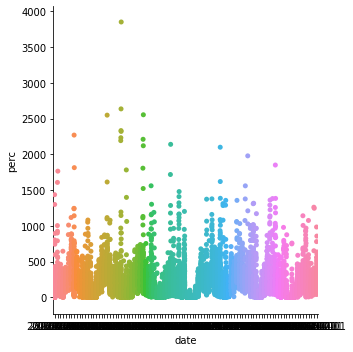

In [84]:
sns.catplot(x="date", y='perc', data = df)

In [88]:
df[df.perc > 2000].sort_values("date")

,adm_level,date,perc,ls_temp_day,ls_temp_night,evi,humid,ns_temp,wind_speed
7975,Zambales,2012-08-01,2268.699417,8072.822142,2362.012503,2305.397673,0.017387,24.379634,6.647184
7987,Zambales,2013-08-01,2547.455208,10178.291963,10151.424840,3069.042960,0.017268,24.729815,5.747263
120,Agusan del Norte,2014-01-01,2231.832987,12786.114121,14114.377927,2684.200566,0.016457,23.291040,5.289532
216,Agusan del Sur,2014-01-01,2191.223630,14286.281083,13307.951079,3706.278653,0.016604,23.995697,4.993724
2520,Compostela Valley,2014-01-01,2320.133430,14579.174031,13240.487209,4166.467730,0.015539,22.364133,5.573161
3096,Davao Oriental,2014-01-01,2331.569114,14300.891286,13915.200592,4456.350405,0.015275,16.276234,6.286174
7608,Surigao del Norte,2014-01-01,2634.903109,12009.203937,11906.939754,2418.749628,0.017036,24.509302,7.148769
7704,Surigao del Sur,2014-01-01,3849.567223,11788.111119,11849.395194,3190.202867,0.016773,24.453918,6.527348
32,Abra,2014-09-01,2119.473551,14726.265768,14445.323029,4562.742289,0.016059,23.992726,4.271827
3680,Ilocos Sur,2014-09-01,2552.602344,14560.863141,14313.823719,4721.617071,0.017474,26.000019,4.560580


In [97]:
df[(df.adm_level == "Surigao del Sur") & (df.perc > 1000)]

,adm_level,date,perc,ls_temp_day,ls_temp_night,evi,humid,ns_temp,wind_speed
7680,Surigao del Sur,2012-01-01,1435.649550,13943.248852,14200.989168,5092.492832,0.017132,25.221754,4.980634
7681,Surigao del Sur,2012-02-01,1607.303819,12728.172812,12385.323458,4420.275627,0.016960,24.823920,5.097828
7692,Surigao del Sur,2013-01-01,1051.407974,11102.405954,8542.478407,4118.940502,0.017429,24.919480,5.201141
7704,Surigao del Sur,2014-01-01,3849.567223,11788.111119,11849.395194,3190.202867,0.016773,24.453918,6.527348
7706,Surigao del Sur,2014-03-01,1397.977953,14562.360760,14298.063773,4804.103226,0.016626,24.835093,5.507752
7715,Surigao del Sur,2014-12-01,1559.969033,13428.217288,14297.355022,4796.079570,0.017761,25.352815,5.058611
7716,Surigao del Sur,2015-01-01,1056.543260,13756.132640,14304.105380,4484.744444,0.016890,24.854251,5.378657
7740,Surigao del Sur,2017-01-01,1619.422099,11171.674247,6573.159900,4146.172043,0.017354,25.087161,5.644841
7741,Surigao del Sur,2017-02-01,1079.499237,12689.103945,12607.857174,3578.365591,0.016606,24.482640,5.911757
7742,Surigao del Sur,2017-03-01,1356.388913,14292.938953,13966.808393,5285.257706,0.016814,24.998897,4.879378


In [116]:
perc = df[["adm_level", "date", "perc"]]
perc.set_index(["adm_level","date"], inplace=True)
#mean_by_region = perc.groupby(['adm_level']).mean()
perc = perc.unstack().transpose()


perc = df[["adm_level", "date", "perc"]]
perc.set_index(["adm_level","date"], inplace=True)
#mean_by_region = perc.groupby(['adm_level']).mean()
perc = perc.unstack().transpose()

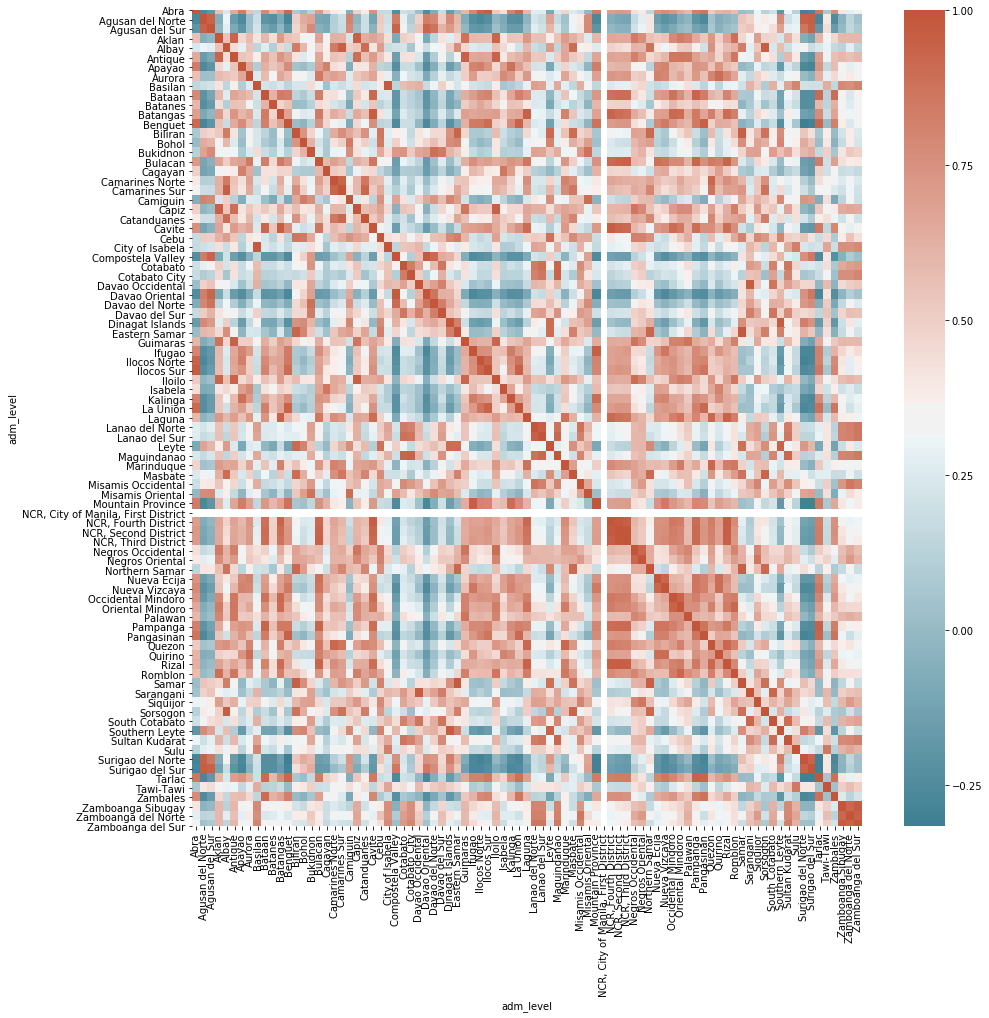

In [120]:
corr = perc.corr()# plot the heatmap
fig, ax = plt.subplots(figsize=(15,15))         
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot=False, cmap=sns.diverging_palette(220, 20, as_cmap=True))